# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a Fake Dataset

## Employee Dataset 

In [2]:
import random
from random import choices 

State_list=['Connecticut','Delaware','Florida','Georgia','Maine','Maryland','Massachusetts','New Hampshire','New Jersy','New York','North Carolina','Pennsylvania','Rhode Island','South Carolina','Virginia']
print(len(State_list))

States = choices(State_list, k=10000)
print('Length:', len(States))
print(set(States))
print(len(set(States)))


15
Length: 10000
{'North Carolina', 'New York', 'Maryland', 'Pennsylvania', 'Delaware', 'Georgia', 'Rhode Island', 'Florida', 'New Hampshire', 'Maine', 'Virginia', 'Connecticut', 'South Carolina', 'New Jersy', 'Massachusetts'}
15


In [3]:
for e in State_list:
    print(e,States.count(e))
    

Connecticut 649
Delaware 681
Florida 709
Georgia 704
Maine 641
Maryland 671
Massachusetts 668
New Hampshire 675
New Jersy 675
New York 651
North Carolina 680
Pennsylvania 665
Rhode Island 644
South Carolina 615
Virginia 672


In [4]:
## employee id

empid = random.sample(range(10001,99999),10000)
empid
print(len(set(empid)))
empid[:5]

10000


[98793, 51424, 38581, 41652, 19642]

In [5]:
## phone 

phone = random.sample(range(10000001,99999999),10000)
phone
print(len(set(phone)))
phone[:5]

10000


[20841109, 72443763, 87250175, 93559715, 43544819]

In [6]:
!pip install Faker 


In [7]:
#Firstname of the Employee  

from faker.providers.person.en import Provider
fstnames = list(set(Provider.first_names))
random.seed(44)
random.shuffle(fstnames)
print(len(fstnames))
print(fstnames[:5])
fstnames_2 = list(set(Provider.first_names))[:10000-6824]
random.seed(42)
random.shuffle(fstnames_2)
print(len(fstnames_2))
print(fstnames_2[:5])

6824
['Calhoun', 'Versie', 'Lavonne', 'Dontae', 'Mathias']
3176
['Barney', 'Dorthy', 'Toney', 'Rosalind', 'Garnet']


In [8]:
fstnames.extend(fstnames_2)
random.shuffle(fstnames)

print(len(fstnames))
print(fstnames[:5])

10000
['Roosevelt', 'Christa', 'Marrion', 'Donato', 'Vernie']


In [9]:
# lastname

from faker.providers.person.en import Provider

lstnames_list = list(Provider.last_names)

random.seed(44)
random.shuffle(lstnames_list)

print(len(lstnames_list))
print(fstnames[:5])

lstnames = lstnames_list*30
lstnames = lstnames[:10000]
random.shuffle(lstnames)
print(len(lstnames))
lstnames[:5]

473
['Roosevelt', 'Christa', 'Marrion', 'Donato', 'Vernie']
10000


['Tromp', "D'Amore", 'Halvorson', 'Berge', 'Torp']

In [10]:
'''fstnames.extend(fstnames_2)
random.shuffle(fstnames)

print(len(fstnames))
print(fstnames[:5])'''

'fstnames.extend(fstnames_2)\nrandom.shuffle(fstnames)\n\nprint(len(fstnames))\nprint(fstnames[:5])'

In [11]:
for e in [empid, fstnames, lstnames, phone, States]:
    print('length:', len(e), 'unique:', len(set(e)))

length: 10000 unique: 10000
length: 10000 unique: 6824
length: 10000 unique: 473
length: 10000 unique: 10000
length: 10000 unique: 15


In [12]:
## Employee Dataframe

df_emp = pd.DataFrame({'employee id':empid, 'name':fstnames, 'lastname':lstnames, 'phone':phone, 'state':States})
df_emp.head()

,employee id,name,lastname,phone,state
0,98793,Roosevelt,Tromp,20841109,Florida
1,51424,Christa,D'Amore,72443763,Massachusetts
2,38581,Marrion,Halvorson,87250175,New Hampshire
3,41652,Donato,Berge,93559715,Georgia
4,19642,Vernie,Torp,43544819,Maryland


In [13]:
print(len(df_emp))
df_emp.isnull().sum()

10000


employee id    0
name           0
lastname       0
phone          0
state          0
dtype: int64

### Salary Dataset 

In [14]:
## department ID

dpt_id = [random.randint(1,7) for e in range(10000)]

print(len(dpt_id))
dpt_id[:5]

10000


[7, 4, 7, 1, 3]

In [15]:
## salary anually 

salary_list = [random.randint(50000,214000) for e in range(10000)]

print(len(salary_list))
salary_list[:5]

10000


[105355, 209417, 98478, 170477, 86713]

In [26]:
df_salary = pd.DataFrame({'employee id':empid, 'DEPARTMENT ID':dpt_id, 'yearly salary':salary_list})
df_salary.head()

,employee id,DEPARTMENT ID,yearly salary
0,98793,7,105355
1,51424,4,209417
2,38581,7,98478
3,41652,1,170477
4,19642,3,86713


In [27]:
print(len(df_salary))
df_salary.isnull().sum()

10000


employee id      0
DEPARTMENT ID    0
yearly salary    0
dtype: int64

In [29]:
df_salary['DEPARTMENT ID'].unique()

array([7, 4, 1, 3, 5, 6, 2], dtype=int64)

### Department Dataset 

In [30]:
df_dpt = pd.DataFrame({'DEPARTMENT ID':list(range(1,8))})
df_dpt

,DEPARTMENT ID
0,1
1,2
2,3
3,4
4,5
5,6
6,7


In [31]:
dept_dict = {1:'HR', 2:'IT', 3:'Finance', 4:'Procurement', 4:'Sales', 5:'Marketing', 6:'Admin', 7:'Services'}

df_dpt['DEPARTMENT NAME'] = df_dpt['DEPARTMENT ID'].map(dept_dict)

In [32]:
df_dpt

,DEPARTMENT ID,DEPARTMENT NAME
0,1,HR
1,2,IT
2,3,Finance
3,4,Sales
4,5,Marketing
5,6,Admin
6,7,Services


### Questions 

#### 1. Visualize the average salary of each department 

In [33]:
df_salary.columns

Index(['employee id', 'DEPARTMENT ID', 'yearly salary'], dtype='object')

In [34]:
df_q1 = pd.merge(df_salary, df_dpt, how='left', on='DEPARTMENT ID')
df_q1.head()

,employee id,DEPARTMENT ID,yearly salary,DEPARTMENT NAME
0,98793,7,105355,Services
1,51424,4,209417,Sales
2,38581,7,98478,Services
3,41652,1,170477,HR
4,19642,3,86713,Finance


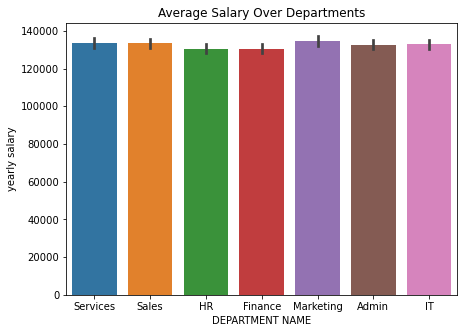

In [36]:
plt.figure(figsize=(7,5))

sns.barplot(data=df_q1, x='DEPARTMENT NAME', y='yearly salary')
plt.title('Average Salary Over Departments')
plt.show()

We can see almost similar salaries for all departments, with department admin having slightly higher salary
compared to other departments and department Sales having slightly lower salary compared to other departments

#### 2. Visualize the total number of employees living in each state for each department 

In [37]:
df_emp.columns

Index(['employee id', 'name', 'lastname', 'phone', 'state'], dtype='object')

In [40]:
df_q21 = pd.merge(df_salary, df_dpt, how='left', on='DEPARTMENT ID')
df_q21.head()

,employee id,DEPARTMENT ID,yearly salary,DEPARTMENT NAME
0,98793,7,105355,Services
1,51424,4,209417,Sales
2,38581,7,98478,Services
3,41652,1,170477,HR
4,19642,3,86713,Finance


In [41]:
df_q2 = pd.merge(df_q21, df_emp[['employee id', 'state']], how='left', on='employee id')
df_q2.head()

,employee id,DEPARTMENT ID,yearly salary,DEPARTMENT NAME,state
0,98793,7,105355,Services,Florida
1,51424,4,209417,Sales,Massachusetts
2,38581,7,98478,Services,New Hampshire
3,41652,1,170477,HR,Georgia
4,19642,3,86713,Finance,Maryland


In [42]:
df_q2['state'].unique()

array(['Florida', 'Massachusetts', 'New Hampshire', 'Georgia', 'Maryland',
       'New York', 'Delaware', 'Connecticut', 'Maine', 'North Carolina',
       'Virginia', 'New Jersy', 'Rhode Island', 'Pennsylvania',
       'South Carolina'], dtype=object)

In [44]:
data=df_q2[(df_q2['state'] == 'Rhode Island') | (df_q2['state'] == 'New Hampshire') | 
                       (df_q2['state'] == 'Maine') |(df_q2['state'] == 'Delaware') | 
                       (df_q2['state'] == 'Massachusetts')].groupby(['state','DEPARTMENT ID']).count()
data.loc['Delaware':'Maine']

employee id  yearly salary  DEPARTMENT NAME
state    DEPARTMENT ID                                             
Delaware 1                       99             99               99
         2                       91             91               91
         3                       92             92               92
         4                      111            111              111
         5                       92             92               92
         6                       97             97               97
         7                       99             99               99
Maine    1                       95             95               95
         2                       91             91               91
         3                      103            103              103
         4                       83             83               83
         5                       91             91               91
         6                       89             89               89
         7                       89             89               89

<Figure size 504x720 with 0 Axes>

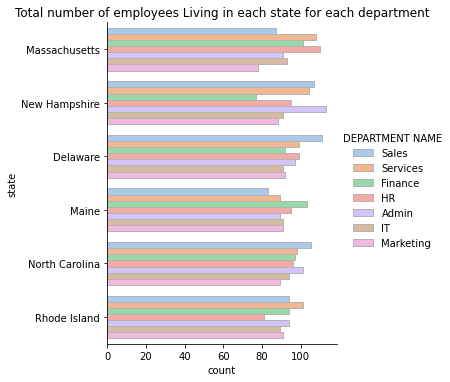

In [45]:
plt.figure(figsize=(7,10))

sns.catplot(y='state', hue='DEPARTMENT NAME', kind='count', edgecolor='0.7',
            palette='pastel',
            data=df_q2[(df_q2['state'] == 'Rhode Island') | (df_q2['state'] == 'New Hampshire') | 
                       (df_q2['state'] == 'Maine') |(df_q2['state'] == 'Delaware') | 
                       (df_q2['state'] == 'Massachusetts') | (df_q2['state'] == 'North Carolina') | 
                       (df_q2['state'] == 'New Jersey')])
plt.title('Total number of employees Living in each state for each department')

plt.show()

<Figure size 504x720 with 0 Axes>

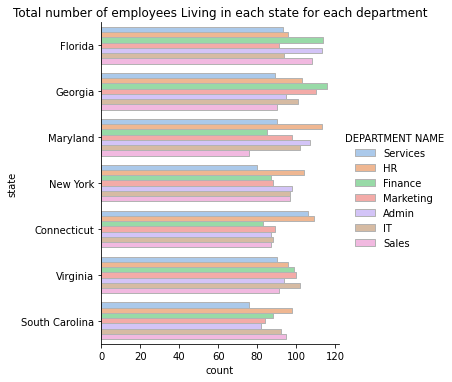

In [46]:
plt.figure(figsize=(7,10))

sns.catplot(y='state', hue='DEPARTMENT NAME', kind='count', edgecolor='0.7',
            palette='pastel',
            data=df_q2[(df_q2['state'] == 'Florida') |
                (df_q2['state'] == 'Virginia') | (df_q2['state'] == 'Connecticut') | 
                       (df_q2['state'] == 'New York') | (df_q2['state'] == 'Maryland') | 
                       (df_q2['state'] == 'South Carolina') |
      (df_q2['state'] == 'Georgia')])
plt.title('Total number of employees Living in each state for each department')

plt.show()

#### 3. Visualize salary distribution of different states 

In [47]:
df_q3 = pd.merge(df_emp, df_salary, how='left', on='employee id')
df_q3.head()

,employee id,name,lastname,phone,state,DEPARTMENT ID,yearly salary
0,98793,Roosevelt,Tromp,20841109,Florida,7,105355
1,51424,Christa,D'Amore,72443763,Massachusetts,4,209417
2,38581,Marrion,Halvorson,87250175,New Hampshire,7,98478
3,41652,Donato,Berge,93559715,Georgia,1,170477
4,19642,Vernie,Torp,43544819,Maryland,3,86713


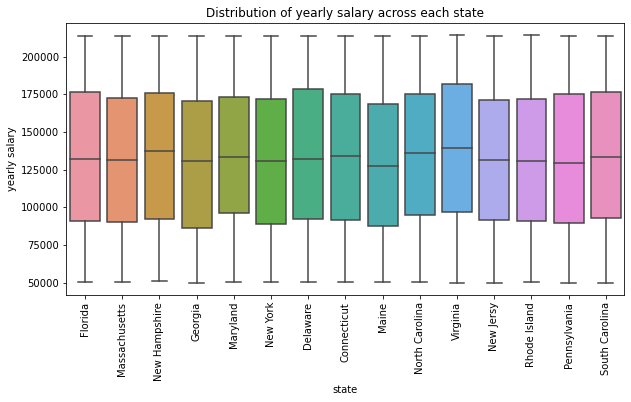

In [48]:
plt.figure(figsize=(10,5))

sns.boxplot(x='state', y='yearly salary',data=df_q3)

plt.title('Distribution of yearly salary across each state')
plt.xticks(rotation=90)

plt.show()

#### 4. Visualize salary distribution of different departments

In [51]:
df_q41 = pd.merge(df_emp, df_salary, how='left', on='employee id')

df_q4 = pd.merge(df_q41, df_dpt, how='left', on='DEPARTMENT ID')
df_q4.head()

,employee id,name,lastname,phone,state,DEPARTMENT ID,yearly salary,DEPARTMENT NAME
0,98793,Roosevelt,Tromp,20841109,Florida,7,105355,Services
1,51424,Christa,D'Amore,72443763,Massachusetts,4,209417,Sales
2,38581,Marrion,Halvorson,87250175,New Hampshire,7,98478,Services
3,41652,Donato,Berge,93559715,Georgia,1,170477,HR
4,19642,Vernie,Torp,43544819,Maryland,3,86713,Finance


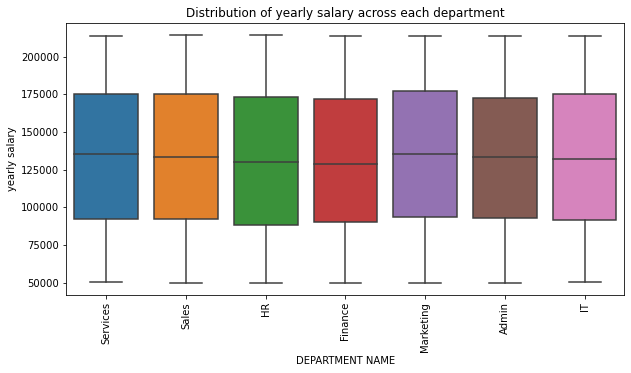

In [52]:
plt.figure(figsize=(10,5))

sns.boxplot(x='DEPARTMENT NAME', y='yearly salary',data=df_q4)

plt.title('Distribution of yearly salary across each department')
plt.xticks(rotation=90)

plt.show()

### Salary distribution as Normal distribution

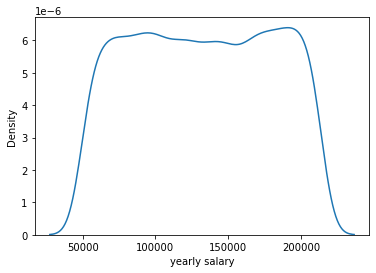

In [53]:
sns.kdeplot(df_salary['yearly salary'])